# Classification of handwritten digits using MLN
## Prof. Laxmidhar Behera
### IIT Kanpur

# MNIST Dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" title="MNIST dataset" align="center"/>



# Problem
Classify handwritten digits from 0 - 9. <br>
Each image is 28x28 pixels

<img src="https://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" title="" align="center"/>


# Understanding the data

In [0]:
# MNIST data is present in the keras library. You may load it from there
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(train_samples, train_labels), (test_samples, test_labels) = mnist.load_data()
# Training samples 

### Shape of Data

In [14]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Range of Values

In [15]:
import numpy as np
np.amax(train_samples) # Max value

255

In [16]:
np.amin(train_samples) # Min Value

0

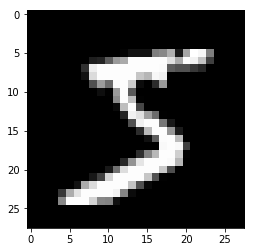

Label of image is 5


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

pixels = train_samples[0] # Shape (28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()
print('Label of image is', train_labels[0])

# Data Preparation

### Normalize inputs to (0, 1)

In [0]:
# Convert data type from uint8 to float32
train_samples = train_samples.astype('float32')
test_samples = test_samples.astype('float32')

In [19]:
# Normalize inputs to (0,1)
train_samples = train_samples/255.
test_samples = test_samples/255.
np.amax(train_samples) # max value has become 1.0

1.0

In [0]:
## Reshape input to be a column vector
train_samples = train_samples.reshape(train_samples.shape[0], 28*28)
test_samples = test_samples.reshape(test_samples.shape[0], 28*28)

### Convert outputs to 1-hot vectors
\begin{equation*}
Eg: 5 \rightarrow [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
\end{equation*}

In [21]:
# keras has a utility function for this
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# example
train_labels[0] # label = 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Network Architecture

<img src="https://drive.google.com/uc?id=1m2jgscTgKlvtzj757I9YMJE2sqNXmMMy" title="" align="center" width="50%" height="50%"/>

### Softmax Activation Function
In the Dense (Fully Connected) layer, we use a softmax activation function
\begin{align}
\sigma(x_j) = \frac{e^{x_j}}{\sum_{i}e^{x_i}}
\end{align}

 The softmax function is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities

In [0]:
# Layer definitions
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape = train_samples.shape[1:])
hidden_layer = Dense(512, activation = 'sigmoid',)(input_layer)
output_layer = Dense(10, activation = 'softmax')(hidden_layer)



Loss is Categorical Crossentropy

\begin{align}
L(t,p) = -\sum_{x}t(x)log(p(x))
\end{align}

where  𝑥  ranges over the elements of the output vector

\begin{align}
t \rightarrow \text{true probability distribution} \\
p \rightarrow \text{predicted probability distribution}
\end{align}
In our case, $t$ is always a delta function. 
For eg., for label = 5,<br>
$t(x) = 1$ if $x = 5$ and 0 otherwise

Weight update Rule

\begin{align}
W' \leftarrow W - \eta\frac{\partial L}{\partial W}
\end{align}

In [28]:
# Model definition
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 28, 512)           14848     
_________________________________________________________________
dense_3 (Dense)              (None, 28, 10)            5130      
Total params: 19,978
Trainable params: 19,978
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_samples.reshape(60,000,28,28), train_labels, validation_split = 0.1, epochs=100, batch_size=200)
# Use 10% of samples for validation, validation_split is the relevant parameter


Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9835
Epoch 2/100
54000/54000 [==============================] - 1s 20us/sample - loss: 0.0021 - acc: 0.9999 - val_loss: 0.0678 - val_acc: 0.9835
Epoch 3/100
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9833
Epoch 4/100
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0018 - acc: 0.9999 - val_loss: 0.0692 - val_acc: 0.9833
Epoch 5/100
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9832
Epoch 6/100
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0706 - val_acc: 0.9837
Epoch 7/100
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0012 - acc: 1.0000 - val_lo

In [0]:
from sklearn.metrics import confusion_matrix
loss, accuracy = model.evaluate(test_samples, test_labels,verbose=0)  # Evaluate the model
print('Accuracy :%0.3f'%accuracy)

pred_labels = model.predict(test_samples)
cm = confusion_matrix(test_labels.argmax(axis=1), pred_labels.argmax(axis=1))
print(cm )



Accuracy :0.940
[[ 968    0    2    2    0    3    2    2    1    0]
 [   0 1112    3    2    1    1    4    2   10    0]
 [   9    1  966   12    8    0    7    8   19    2]
 [   2    1   17  943    0    9    1   11   17    9]
 [   2    2   10    0  918    0    6    5    5   34]
 [   9    2    4   34    5  793    8    5   25    7]
 [  14    3   12    1    6   13  903    3    3    0]
 [   1    7   22    6    3    1    0  962    2   24]
 [   6    4    7   16    8   11    9    8  901    4]
 [  11    6    1   12   18    4    0   13    6  938]]


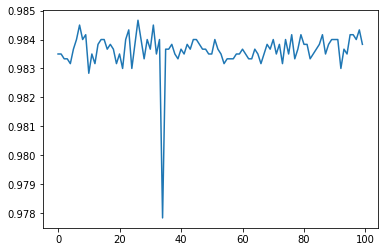

In [25]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])
plt.show()